In [4]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt


Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:
- Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
- Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
- Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
- Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
- Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
- Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y
rojo.

In [25]:
def img_change(img_name, color):

    img = cv2.imread(img_name, cv2.IMREAD_COLOR)
    ancho = img.shape[0]
    alto = img.shape[1]
    color_change = np.zeros((ancho, alto, 1))
    for i in range(0, ancho):
        for j in range(0, alto):
            pixel = img[i, j]
            if color == 1:      # Apagamos pixel rojo y verde
                pixel[1] = 0
                pixel[2] = 0
            elif color == 2:    # Apagamos pixel azul y rojo
                pixel[0] = 0
                pixel[2] = 0
            elif color == 3:    # Apagamos pixel azul y verde
                pixel[0] = 0
                pixel[1] = 0
            elif color == 10:   # Apagamos pixel azul
                pixel[0] = 0
            elif color == 20:   # Apagamos pixel rojo
                pixel[2] = 0
            elif color == 30:   # Apagamos pixel verde
                pixel[1] = 0
            color_change[i, j] = int(pixel[0] + pixel[1] + pixel[2])
    cv2.imwrite('Imagen.jpg', img)

C:\Users\fahv1\AppData\Local\Temp\ipykernel_27360\1668903439.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
  color_change[i, j] = int(pixel[0] + pixel[1] + pixel[2])


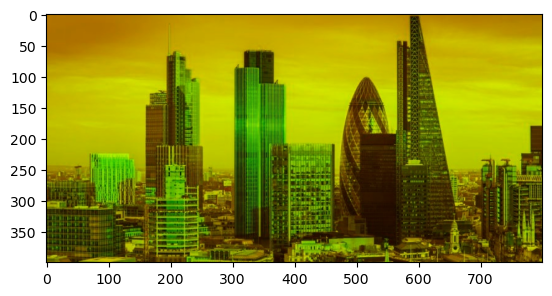

In [26]:
imagen_name = 'edificios.jpg'

color = int(input("Ingrese opcion: "))
img_change(imagen_name, color)
imgTemp = cv2.imread('Imagen.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(imgTemp, cmap='gray')
plt.show()


En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes
fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se
construya la imagen original a color.

In [28]:
def create_image_gray(imagen_red, imagen_green, imagen_blue):
    grey_red = cv2.imread(imagen_red, cv2.IMREAD_GRAYSCALE)
    grey_blue = cv2.imread(imagen_blue, cv2.IMREAD_GRAYSCALE)
    grey_green = cv2.imread(imagen_green, cv2.IMREAD_GRAYSCALE)
    ancho = grey_red.shape[0]
    alto = grey_red.shape[1]
    color_array = np.zeros((ancho, alto, 3))
    for i in range(0, ancho):
        for j in range(0, alto):
            pixel_blue = grey_blue[i, j]
            pixel_red = grey_red[i, j]
            pixel_green = grey_green[i, j]
            color_array[i, j] = [pixel_blue, pixel_green, pixel_red]

    cv2.imwrite('color_image.jpg', color_array)
    color_image = cv2.imread('color_image.jpg', cv2.IMREAD_COLOR)
    plt.imshow(color_image, cmap='gray')
    plt.show()

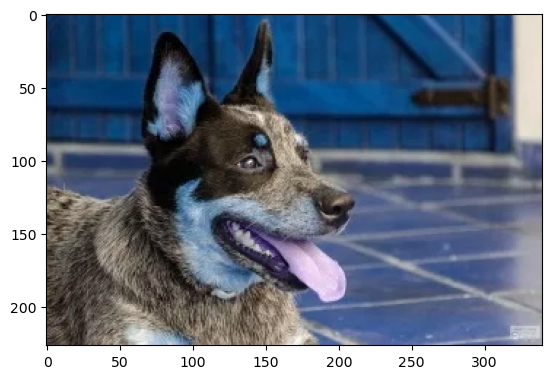

In [33]:
imagen1 = "imagen3\perro_salida_gray_azul.jpg"
imagen2 = "imagen3\perro_salida_gray_rojo.jpg"
imagen3 = "imagen3\perro_salida_gray_verde.jpg"

create_image_gray(imagen2, imagen3, imagen1)